In [1]:
import matplotlib.pyplot as plt
import numpy as np
from uncertainties import ufloat
from uncertainties.umath import *  # sin(), etc.
from uncertainties import unumpy
from matplotlib import font_manager

In [2]:
from matplotlib import font_manager

font_path = '../Ruda/Ruda-VariableFont_wght.ttf'
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()

In [3]:
print(28/(1000**2*100),'partículas por nm^3')
print(2.8e20,'partículas em m^3')

2.8e-07 partículas por nm^3
2.8e+20 partículas em m^3


In [4]:
print('qtd max de partículas em um cubo de 5 cm')
print(2.8e20*5e-2**2*1e-3)

qtd max de partículas em um cubo de 5 cm
700000000000000.1


In [5]:
v = 1e-7*24*3600
flow = 1e-7*24*3600
C_MP = 240e13
N_max = 2.8e20*0.05**2*0.001 # ufloat(100, 5)
E_0 = ufloat(0.83,0.02) # ufloat(0.9, 0.1)
# N_max_2 = ufloat(75, 5)
# E_0_2 = ufloat(0.6, 0.1)


In [6]:
# E(t) = E_0 e^{-\frac{v C_{MP} E_0 t}{N_{max}}

E_0_i = 0.83
C_MP = 240e12

def eff_t(t):
    result = E_0 * np.exp(-(flow * C_MP * E_0 * t)/(N_max))
    return result

final_values = []
for E_0 in (E_0_i-0.02,E_0_i+0.02):
    time_vals,eff_vals,r_eff_vals = [],[],[]
    
    for i in np.linspace(1,1000,1000):
        r = eff_t(i)
        eff_vals.append(r)
        r_eff_vals.append(round(r,1))
        time_vals.append(round(i))
    
    final_values.append(eff_vals)

    plt.plot(np.array(time_vals)/30,eff_vals,color=PALETTE[1])

plt.fill_between(np.array(time_vals)/30,final_values[0],final_values[1],color=PALETTE[1], alpha=0.2)

plt.xlabel('Time (months)',fontsize=16)
plt.ylabel('Efficiency',fontsize=16)

plt.axhline(y=0.5,linestyle='--',color='gray',xmin=0,xmax=0.205)
plt.axvline(x=205/30,linestyle='--',color='gray',ymin=0,ymax=0.48)

plt.scatter(205/30,0.5,color=PALETTE[1],marker='s',label=f'Half Efficiency: {round(205/30,2)} Months')

plt.ylim(0,1)
plt.xlim(0,32)
plt.legend(fontsize=14)
plt.grid()
plt.tight_layout()

# plt.savefig('results/efficiency.png',dpi=800,transparent=True)
plt.show()

NameError: name 'PALETTE' is not defined

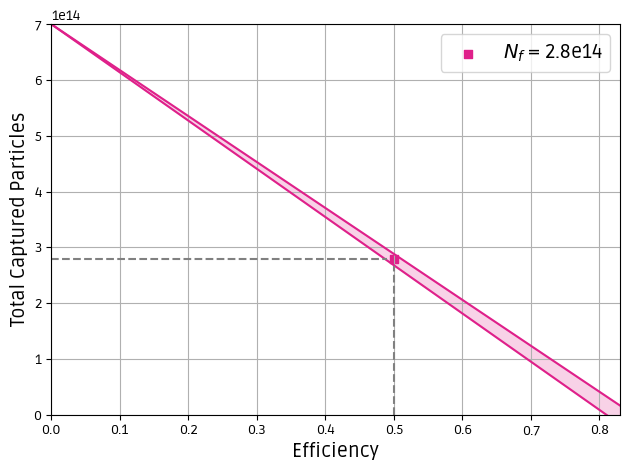

In [ ]:
# N_f(E_f) = N_max ( 1 - \frac{E_f}{E_0})

E_0_i = 0.83

def n_f(E_f):
    return N_max * (1-E_f/E_0)

E_F_list = np.linspace(0,.83,100)

n_f_vals_final = []
for E_0 in [E_0_i-0.02,E_0_i+0.02]:
    n_f_vals = []
    for i in E_F_list:
        n_f_vals.append(n_f(i))

    plt.plot(E_F_list,n_f_vals,color=PALETTE[1])
    n_f_vals_final.append(n_f_vals)

plt.fill_between(E_F_list,n_f_vals_final[0],n_f_vals_final[1],color=PALETTE[1], alpha=0.2)
plt.xlim(0,0.83)
plt.ylim(0,7e14)
plt.grid()
plt.tight_layout()

plt.axvline(x=.5,linestyle='--',color='gray',ymin=0,ymax=0.38)
plt.axhline(y=2.8e14,linestyle='--',color='gray',xmin=0,xmax=0.59)
plt.scatter(.5,2.8e14,label='$N_f$ = 2.8e14',marker='s',color=PALETTE[1])

plt.xlabel('Efficiency',fontsize=14)
plt.ylabel('Total Captured Particles',fontsize=14)
plt.legend(fontsize=14)
plt.tight_layout()

# plt.savefig('results/eff_particles.png',dpi=800,transparent=True)
plt.show()

In [37]:
Dt = np.linspace(0, 1800, 300)
dt = np.linspace(0, 1800, 300)

def N(t):
    N_unc = N_max*(1 - np.e**(-(v*C_MP*E_0/N_max)*t))
    N_value = unumpy.nominal_values(N_unc)
    N_std = unumpy.std_devs(N_unc)
    return N_value, N_std

def N_2(t):
    N_unc = N_max_2*(1 - np.e**(-(v*C_MP*E_0_2/N_max_2)*t))
    N_value = unumpy.nominal_values(N_unc)
    N_std = unumpy.std_devs(N_unc)
    return N_value, N_std

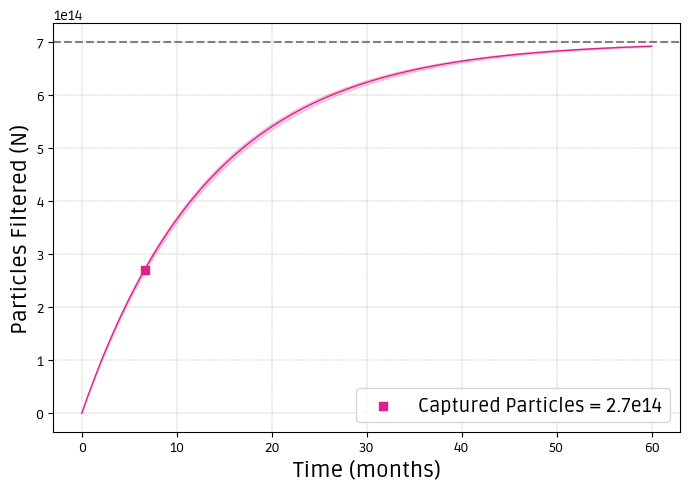

In [38]:
PALETTE = ['#1b6872', '#df208a', '#efb475', '#aec5fb', '#D5A6E6', '#A4D4B4', '#FFD166', '#FF6F61']

E_0 = ufloat(0.83,0.02) # ufloat(0.9, 0.1)
C_MP = 240e12

# Create the plot again for saving and displaying
plt.figure(figsize=(7,5))
plt.plot(dt/30, N(dt)[0], color=PALETTE[1], linewidth=1)
plt.fill_between(dt/30, N(dt)[0] - N(dt)[1], N(dt)[0] + N(dt)[1], color=PALETTE[1], alpha=0.2)

# plt.plot(dt, N_2(dt)[0], color=PALETTE[0], linewidth=1, label = f'BaCBM2')
# plt.fill_between(dt, N_2(dt)[0] - N_2(dt)[1], N_2(dt)[0] + N_2(dt)[1], color=PALETTE[0], alpha=0.2)
#plt.scatter(Dt, N(Dt), color=PALETTE[0], s=10)

# Classic styling: grid and labels without background color
plt.grid(True, linestyle='--', linewidth=0.3, color='gray', alpha=0.8)
#plt.title('Classic 2D Graph', fontsize=16, pad=5, fontproperties=font_prop)
plt.xlabel('Time (months)', fontsize=16)
plt.ylabel('Particles Filtered (N)', fontsize=16)
# plt.xlim(0,40)
# plt.ylim(0,7.5e14)
# plt.legend(fontsize=12, loc=1, bbox_to_anchor=(1.4, 1), framealpha=0.0)
# plt.legend(fontsize=12)

# plt.axvline(x=6.65,linestyle='--',color='gray',ymin=0,ymax=0.34)
# plt.axhline(y=2.7e14,linestyle='--',color='gray',xmin=0,xmax=0.16)

plt.axhline(y=N_max,linestyle='--',color='gray')

plt.scatter(6.65,2.7e14,marker='s',color=PALETTE[1],label='Captured Particles = 2.7e14')

# plt.gca().spines[['right', 'top']].set_visible(False)
plt.legend(fontsize=14)
plt.tight_layout()

# plt.savefig('example.svg', format='svg', bbox_inches='tight', transparent=True)
# plt.savefig('results/captured_particles.png',dpi=500,transparent=True)

plt.show()

In [11]:
v,C_MP,E_0

(0.00864, 240000000000000.0, 0.83+/-0.02)

In [18]:
((np.exp(1)*N_max)*(v*C_MP*E_0))/30

1.0916271883017485e+26+/-2.63042695976325e+24